In [1]:
from LOCA2.LOCA2_processor import loca2_processing
from NEX_GDDP_CMIP6.NEX_GDDP_CMIP6_processor import nexgddpcmip6_processing
import xarray as xr
import matplotlib.pyplot as plt
import cartopy.feature as cfeature
import cartopy.crs as ccrs
import matplotlib
import shapely
import rioxarray
import geopandas as gpd
import rasterio
import numpy as np
import pandas as pd

In [2]:
tasmax_2020_2070_ssp245 = xr.open_dataarray('LOCA2_tasmax_2020_2070_ssp245_02_24_25.nc')
tasmax_2020_2070_ssp245.load()

<xarray.DataArray 'tasmax' (time: 18628, lat: 108, lon: 109)> Size: 877MB
array([[[283.99844, 284.2695 , 284.18155, ..., 282.88535, 283.05386,
         283.30923],
        [283.42673, 283.50946, 283.57224, ..., 283.07657, 283.03934,
         283.18906],
        [283.2377 , 282.85675, 283.0149 , ..., 283.0068 , 283.04208,
         282.7375 ],
        ...,
        [273.41937, 273.3973 , 273.3689 , ..., 276.21802, 276.18942,
         276.1036 ],
        [273.38467, 273.41812, 273.4092 , ..., 276.33463, 276.28513,
         276.2296 ],
        [272.10837, 272.0914 , 272.14142, ..., 277.02423, 277.22775,
         277.39148]],

       [[283.62643, 283.90903, 283.87735, ..., 282.80887, 283.07898,
         283.30386],
        [283.11203, 283.28894, 283.39594, ..., 282.86313, 282.87985,
         283.01068],
        [283.07578, 282.9294 , 283.13998, ..., 282.69955, 282.89294,
         282.73672],
...
        [277.1218 , 277.07004, 276.97012, ..., 279.2235 , 279.17276,
         279.0936 ],
        [276.9712 , 276.97858, 276.93716, ..., 279.3575 , 279.27814,
         279.19937],
        [273.8487 , 273.52402, 273.35822, ..., 275.1989 , 275.39017,
         275.45624]],

       [[286.01816, 286.2642 , 286.26782, ..., 286.1245 , 286.31775,
         286.5192 ],
        [285.54227, 285.6578 , 285.7886 , ..., 286.29858, 286.26367,
         286.3384 ],
        [285.43793, 285.0851 , 285.30057, ..., 286.21362, 286.35013,
         286.0884 ],
        ...,
        [274.82147, 274.73215, 274.5455 , ..., 278.01297, 278.00833,
         277.96872],
        [274.5575 , 274.57565, 274.54602, ..., 278.11584, 278.0553 ,
         278.0183 ],
        [272.07898, 272.0574 , 272.09515, ..., 276.3282 , 276.2938 ,
         276.43918]]], shape=(18628, 108, 109), dtype=float32)
Coordinates:
  * lon      (lon) float64 872B 267.2 267.3 267.3 267.4 ... 273.8 273.9 274.0
  * lat      (lat) float64 864B 36.03 36.09 36.16 36.22 ... 42.59 42.66 42.72
  * time     (time) datetime64[ns] 149kB 2020-01-01 2020-01-02 ... 2070-12-31

In [3]:
tasmax_lonchange = tasmax_2020_2070_ssp245.assign_coords({'lon':tasmax_2020_2070_ssp245.lon-360}).isel(lat=slice(0,-1))
tasmax_2020_2070_ssp245_hottest = tasmax_lonchange.isel(time=slice(0,-366)).resample(
    time='5Y', closed='left', label='left').max()
tasmax_2020_2070_ssp245_hottest.load()

/data/keeling/a/mailes2/miniconda3/envs/clim_gis/lib/python3.13/site-packages/xarray/groupers.py:490: FutureWarning: 'Y' is deprecated and will be removed in a future version, please use 'YE' instead.
  self.index_grouper = pd.Grouper(


<xarray.DataArray 'tasmax' (time: 10, lat: 107, lon: 109)> Size: 467kB
array([[[308.6644 , 308.8758 , 308.8331 , ..., 307.32388, 307.46237,
         307.47455],
        [308.30588, 308.4673 , 308.55075, ..., 307.6157 , 307.4872 ,
         307.50253],
        [308.49307, 308.3812 , 308.47958, ..., 307.68857, 307.63968,
         307.2238 ],
        ...,
        [305.8174 , 305.81894, 305.7727 , ..., 303.9603 , 304.21872,
         304.40918],
        [306.06555, 306.01364, 305.88718, ..., 304.08716, 304.26605,
         304.4631 ],
        [306.20157, 306.18262, 306.04663, ..., 304.2438 , 304.2717 ,
         304.36282]],

       [[309.61414, 309.91052, 309.83847, ..., 307.479  , 307.55103,
         307.6165 ],
        [309.2086 , 309.42435, 309.47958, ..., 307.75436, 307.58737,
         307.59177],
        [309.2372 , 309.1361 , 309.22287, ..., 307.83035, 307.69513,
         307.3163 ],
...
        [307.20023, 307.19467, 307.2214 , ..., 305.82327, 306.16327,
         306.4423 ],
        [307.4658 , 307.4431 , 307.40494, ..., 305.82803, 306.0405 ,
         306.2737 ],
        [307.61862, 307.6218 , 307.53745, ..., 305.85614, 305.8823 ,
         306.00162]],

       [[310.6687 , 310.88235, 310.8633 , ..., 308.71188, 308.91666,
         309.00778],
        [310.35147, 310.56262, 310.65646, ..., 308.9802 , 308.9169 ,
         308.96542],
        [310.5382 , 310.4144 , 310.6434 , ..., 309.00156, 308.99924,
         308.6569 ],
        ...,
        [306.94034, 306.9611 , 306.94525, ..., 305.5972 , 305.90726,
         306.16348],
        [307.22192, 307.18933, 307.13284, ..., 305.5453 , 305.7399 ,
         305.97037],
        [307.36758, 307.38394, 307.2789 , ..., 305.5651 , 305.6261 ,
         305.77658]]], shape=(10, 107, 109), dtype=float32)
Coordinates:
  * lat      (lat) float64 856B 36.03 36.09 36.16 36.22 ... 42.53 42.59 42.66
  * lon      (lon) float64 872B -92.78 -92.72 -92.66 ... -86.16 -86.09 -86.03
  * time     (time) datetime64[ns] 80B 2019-12-31 2024-12-31 ... 2064-12-31

In [4]:
tasmax_2020_2070_ssp245_hottest.to_netcdf('LOCA2_tasmax_2020_2070_ssp245_lonchange_5yrmean_04_16_25.nc')

In [5]:
tasmax_full = rioxarray.open_rasterio('LOCA2_tasmax_2020_2070_ssp245_lonchange_5yrmean_04_16_25.nc')
tasmax_full

<xarray.DataArray 'tasmax' (time: 10, y: 107, x: 109)> Size: 467kB
[116630 values with dtype=float32]
Coordinates:
  * x            (x) float64 872B -92.78 -92.72 -92.66 ... -86.16 -86.09 -86.03
  * y            (y) float64 856B 42.66 42.59 42.53 42.47 ... 36.16 36.09 36.03
  * time         (time) object 80B 2019-12-31 00:00:00 ... 2064-12-31 00:00:00
    spatial_ref  int64 8B 0
Attributes:
    lat#long_name:           lat
    lat#units:               degreesN
    lat#_FillValue:          nan
    lon#_FillValue:          nan
    NETCDF_DIM_EXTRA:        {time}
    NETCDF_DIM_time_DEF:     [10. 10.]
    NETCDF_DIM_time_VALUES:  [    0.  1827.  3653.  5479.  7305.  9132. 10958...
    _FillValue:              nan
    scale_factor:            1.0
    add_offset:              0.0

In [6]:
tasmax_full.rio.to_raster('ssp245_2020_2070_5yrmean_raster_04_16_25.tif')

In [9]:
!rio info ssp245_2020_2070_5yrmean_raster_04_16_25.tif

{"blockxsize": 109, "blockysize": 1, "bounds": [-92.8125, 36.0, -86.0, 42.6875], "colorinterp": ["gray", "undefined", "undefined", "undefined", "undefined", "undefined", "undefined", "undefined", "undefined", "undefined"], "count": 10, "crs": null, "descriptions": ["tasmax", "tasmax", "tasmax", "tasmax", "tasmax", "tasmax", "tasmax", "tasmax", "tasmax", "tasmax"], "driver": "GTiff", "dtype": "float32", "height": 107, "indexes": [1, 2, 3, 4, 5, 6, 7, 8, 9, 10], "interleave": "pixel", "mask_flags": [["nodata"], ["nodata"], ["nodata"], ["nodata"], ["nodata"], ["nodata"], ["nodata"], ["nodata"], ["nodata"], ["nodata"]], "nodata": NaN, "res": [0.0625, 0.0625], "shape": [107, 109], "tiled": false, "transform": [0.0625, 0.0, -92.8125, 0.0, -0.0625, 42.6875, 0.0, 0.0, 1.0], "units": [null, null, null, null, null, null, null, null, null, null], "width": 109}


In [10]:
tasmax_open = rasterio.open('ssp245_2020_2070_5yrmean_raster_04_16_25.tif')
tasmax_open

<open DatasetReader name='ssp245_2020_2070_5yrmean_raster_04_16_25.tif' mode='r'>

In [11]:
shapes = []
for band in range(1,11):
    shapes.append(rasterio.features.shapes(rasterio.band(tasmax_open, band)))
shapes

[<generator object shapes at 0x2b45c90484f0>,
 <generator object shapes at 0x2b45c90485e0>,
 <generator object shapes at 0x2b45c90486d0>,
 <generator object shapes at 0x2b45c90487c0>,
 <generator object shapes at 0x2b45c90488b0>,
 <generator object shapes at 0x2b45c90489a0>,
 <generator object shapes at 0x2b45c9048c70>,
 <generator object shapes at 0x2b45c9048d60>,
 <generator object shapes at 0x2b45c9048a90>,
 <generator object shapes at 0x2b45c9048b80>]

In [12]:
pol_list = []
for band in range(0,10):
    pol_list.append(list(shapes[band]))
pol_list[0]

[({'type': 'Polygon',
   'coordinates': [[(-92.8125, 42.6875),
     (-92.8125, 42.625),
     (-92.75, 42.625),
     (-92.75, 42.6875),
     (-92.8125, 42.6875)]]},
  306.2015686035156),
 ({'type': 'Polygon',
   'coordinates': [[(-92.75, 42.6875),
     (-92.75, 42.625),
     (-92.6875, 42.625),
     (-92.6875, 42.6875),
     (-92.75, 42.6875)]]},
  306.1826171875),
 ({'type': 'Polygon',
   'coordinates': [[(-92.6875, 42.6875),
     (-92.6875, 42.625),
     (-92.625, 42.625),
     (-92.625, 42.6875),
     (-92.6875, 42.6875)]]},
  306.046630859375),
 ({'type': 'Polygon',
   'coordinates': [[(-92.625, 42.6875),
     (-92.625, 42.625),
     (-92.5625, 42.625),
     (-92.5625, 42.6875),
     (-92.625, 42.6875)]]},
  305.8829650878906),
 ({'type': 'Polygon',
   'coordinates': [[(-92.5625, 42.6875),
     (-92.5625, 42.625),
     (-92.5, 42.625),
     (-92.5, 42.6875),
     (-92.5625, 42.6875)]]},
  305.9039611816406),
 ({'type': 'Polygon',
   'coordinates': [[(-92.5, 42.6875),
     (-92.5, 42

In [13]:
# Going from a list of GeoJSON-like dicts to a list of shapely geometry objects
geom = []
for band in range(0,10):
    geom_i = [shapely.geometry.shape(i[0]) for i in pol_list[band]]
    # Convert to a GeoSeries
    geom_i = gpd.GeoSeries(geom_i, crs='NAD83')
    geom.append(geom_i)
    print(geom_i.crs)
geom

NAD83
NAD83
NAD83
NAD83
NAD83
NAD83
NAD83
NAD83
NAD83
NAD83


[0        POLYGON ((-92.8125 42.6875, -92.8125 42.625, -...
 1        POLYGON ((-92.75 42.6875, -92.75 42.625, -92.6...
 2        POLYGON ((-92.6875 42.6875, -92.6875 42.625, -...
 3        POLYGON ((-92.625 42.6875, -92.625 42.625, -92...
 4        POLYGON ((-92.5625 42.6875, -92.5625 42.625, -...
                                ...                        
 11341    POLYGON ((-86.3125 36.0625, -86.3125 36, -86.2...
 11342    POLYGON ((-86.25 36.0625, -86.25 36, -86.1875 ...
 11343    POLYGON ((-86.1875 36.0625, -86.1875 36, -86.1...
 11344    POLYGON ((-86.125 36.0625, -86.125 36, -86.062...
 11345    POLYGON ((-86.0625 36.0625, -86.0625 36, -86 3...
 Length: 11346, dtype: geometry,
 0        POLYGON ((-92.8125 42.6875, -92.8125 42.625, -...
 1        POLYGON ((-92.75 42.6875, -92.75 42.625, -92.6...
 2        POLYGON ((-92.6875 42.6875, -92.6875 42.625, -...
 3        POLYGON ((-92.625 42.6875, -92.625 42.625, -92...
 4        POLYGON ((-92.5625 42.6875, -92.5625 42.625, -...
       

In [14]:
for i in tasmax_full['time'].values:
    print(np.count_nonzero(np.isnan(tasmax_full.sel(time=i))))

272
272
272
272
272
272
272
272
272
272


In [15]:
# Extract values as well
values = []
for band in range(0,10):
    values_i = [i[1] for i in pol_list[band]]
    values_i = pd.Series(values_i)
    values.append(values_i)
values

[0        306.201569
 1        306.182617
 2        306.046631
 3        305.882965
 4        305.903961
             ...    
 11341    307.900543
 11342    307.638336
 11343    307.323883
 11344    307.462372
 11345    307.474548
 Length: 11346, dtype: float64,
 0        305.668732
 1        305.651611
 2        305.549194
 3        305.412262
 4        305.427124
             ...    
 11343    308.120300
 11344    307.820801
 11345    307.479004
 11346    307.551025
 11347    307.616486
 Length: 11348, dtype: float64,
 0        305.855377
 1        305.845184
 2        305.707306
 3        305.555634
 4        305.575378
             ...    
 11339    308.063934
 11340    307.780640
 11341    307.462036
 11342    307.588837
 11343    307.666504
 Length: 11344, dtype: float64,
 0        306.112701
 1        306.160034
 2        306.103638
 3        306.001129
 4        306.057556
             ...    
 11354    308.083130
 11355    307.824829
 11356    307.537842
 11357    307.654297
 

In [16]:
tasmax_full['time'].values
time_str = [str(i) for i in tasmax_full['time'].values]
time_str

['2019-12-31 00:00:00',
 '2024-12-31 00:00:00',
 '2029-12-31 00:00:00',
 '2034-12-31 00:00:00',
 '2039-12-31 00:00:00',
 '2044-12-31 00:00:00',
 '2049-12-31 00:00:00',
 '2054-12-31 00:00:00',
 '2059-12-31 00:00:00',
 '2064-12-31 00:00:00']

In [17]:
geoframe_dict = {}
for i in range(len(values)):
    geoframe_dict[time_str[i]] = gpd.GeoDataFrame({'value': values[i], 'geometry': geom[i]})
geoframe_dict

{'2019-12-31 00:00:00':             value                                           geometry
 0      306.201569  POLYGON ((-92.8125 42.6875, -92.8125 42.625, -...
 1      306.182617  POLYGON ((-92.75 42.6875, -92.75 42.625, -92.6...
 2      306.046631  POLYGON ((-92.6875 42.6875, -92.6875 42.625, -...
 3      305.882965  POLYGON ((-92.625 42.6875, -92.625 42.625, -92...
 4      305.903961  POLYGON ((-92.5625 42.6875, -92.5625 42.625, -...
 ...           ...                                                ...
 11341  307.900543  POLYGON ((-86.3125 36.0625, -86.3125 36, -86.2...
 11342  307.638336  POLYGON ((-86.25 36.0625, -86.25 36, -86.1875 ...
 11343  307.323883  POLYGON ((-86.1875 36.0625, -86.1875 36, -86.1...
 11344  307.462372  POLYGON ((-86.125 36.0625, -86.125 36, -86.062...
 11345  307.474548  POLYGON ((-86.0625 36.0625, -86.0625 36, -86 3...
 
 [11346 rows x 2 columns],
 '2024-12-31 00:00:00':             value                                           geometry
 0      305.668

NameError: name 'geoframe' is not defined

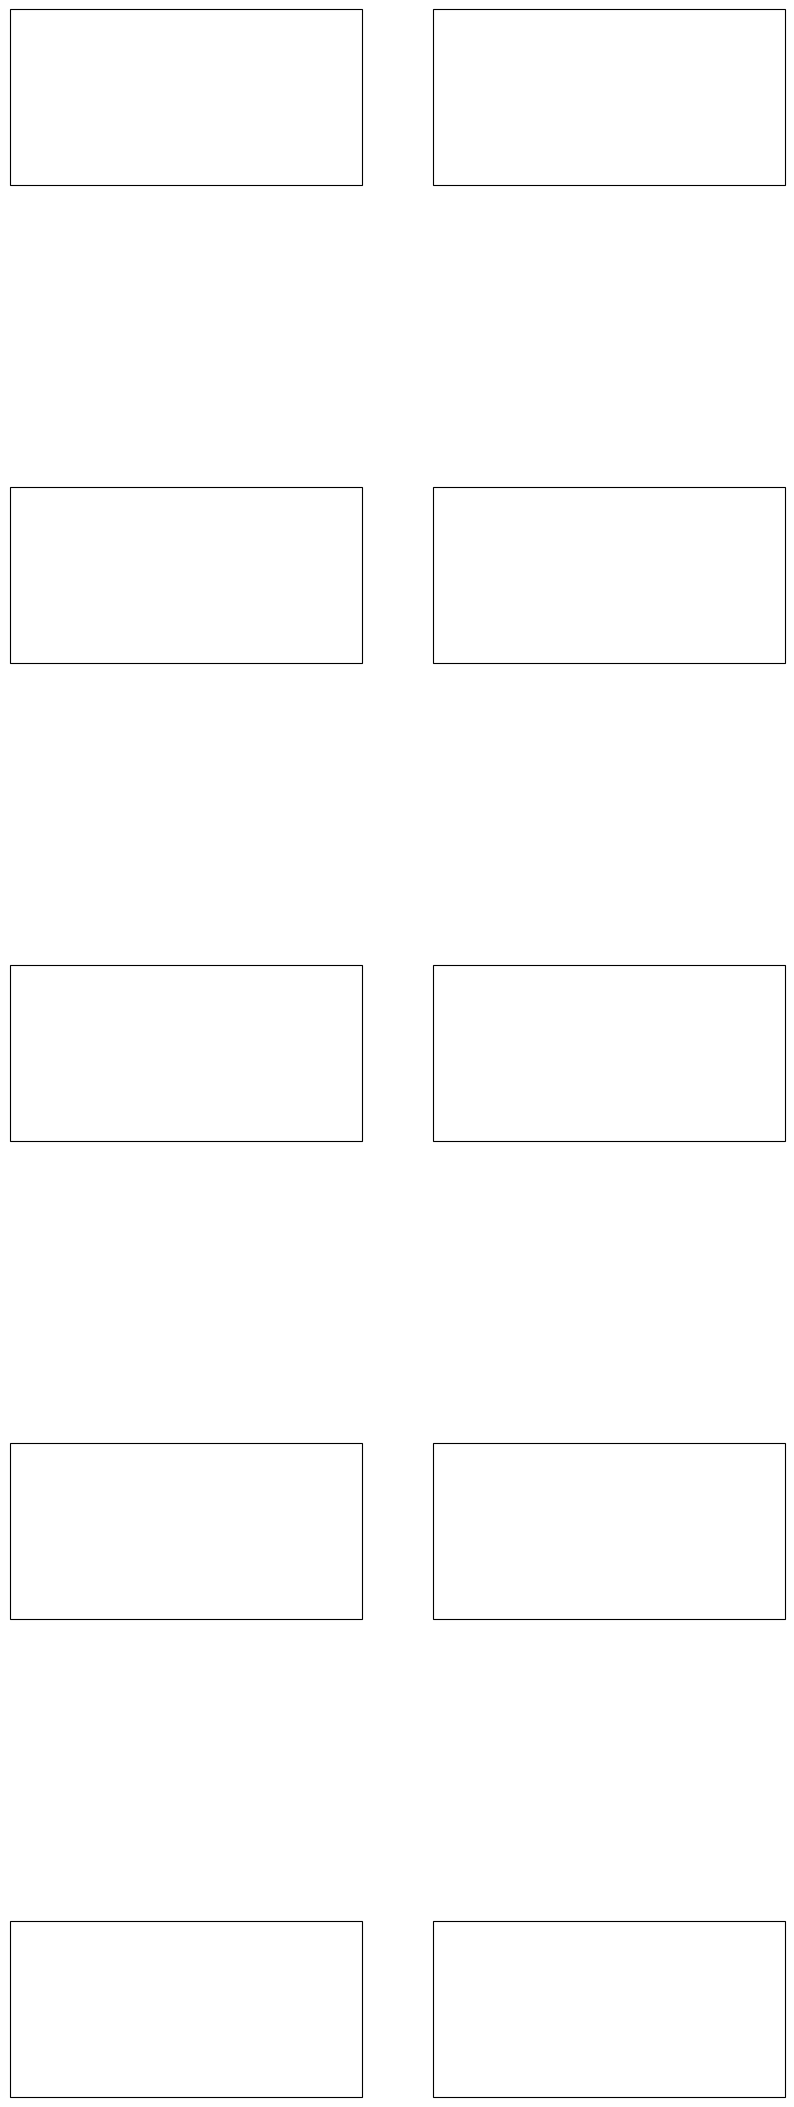

In [19]:
plt.rcParams['figure.figsize'] = [10, 30]
fig, ax = plt.subplots(5,2, subplot_kw={'projection':ccrs.PlateCarree(central_longitude=180)})
ax = ax.flatten()

vmin = 302.59
vmax = 313.71

i = 0
for time in geoframe.columns[:-1]:
    geoframe.plot(column=time, ax=ax[i], vmin=vmin, vmax=vmax, cmap='hot_r',)
    i += 1

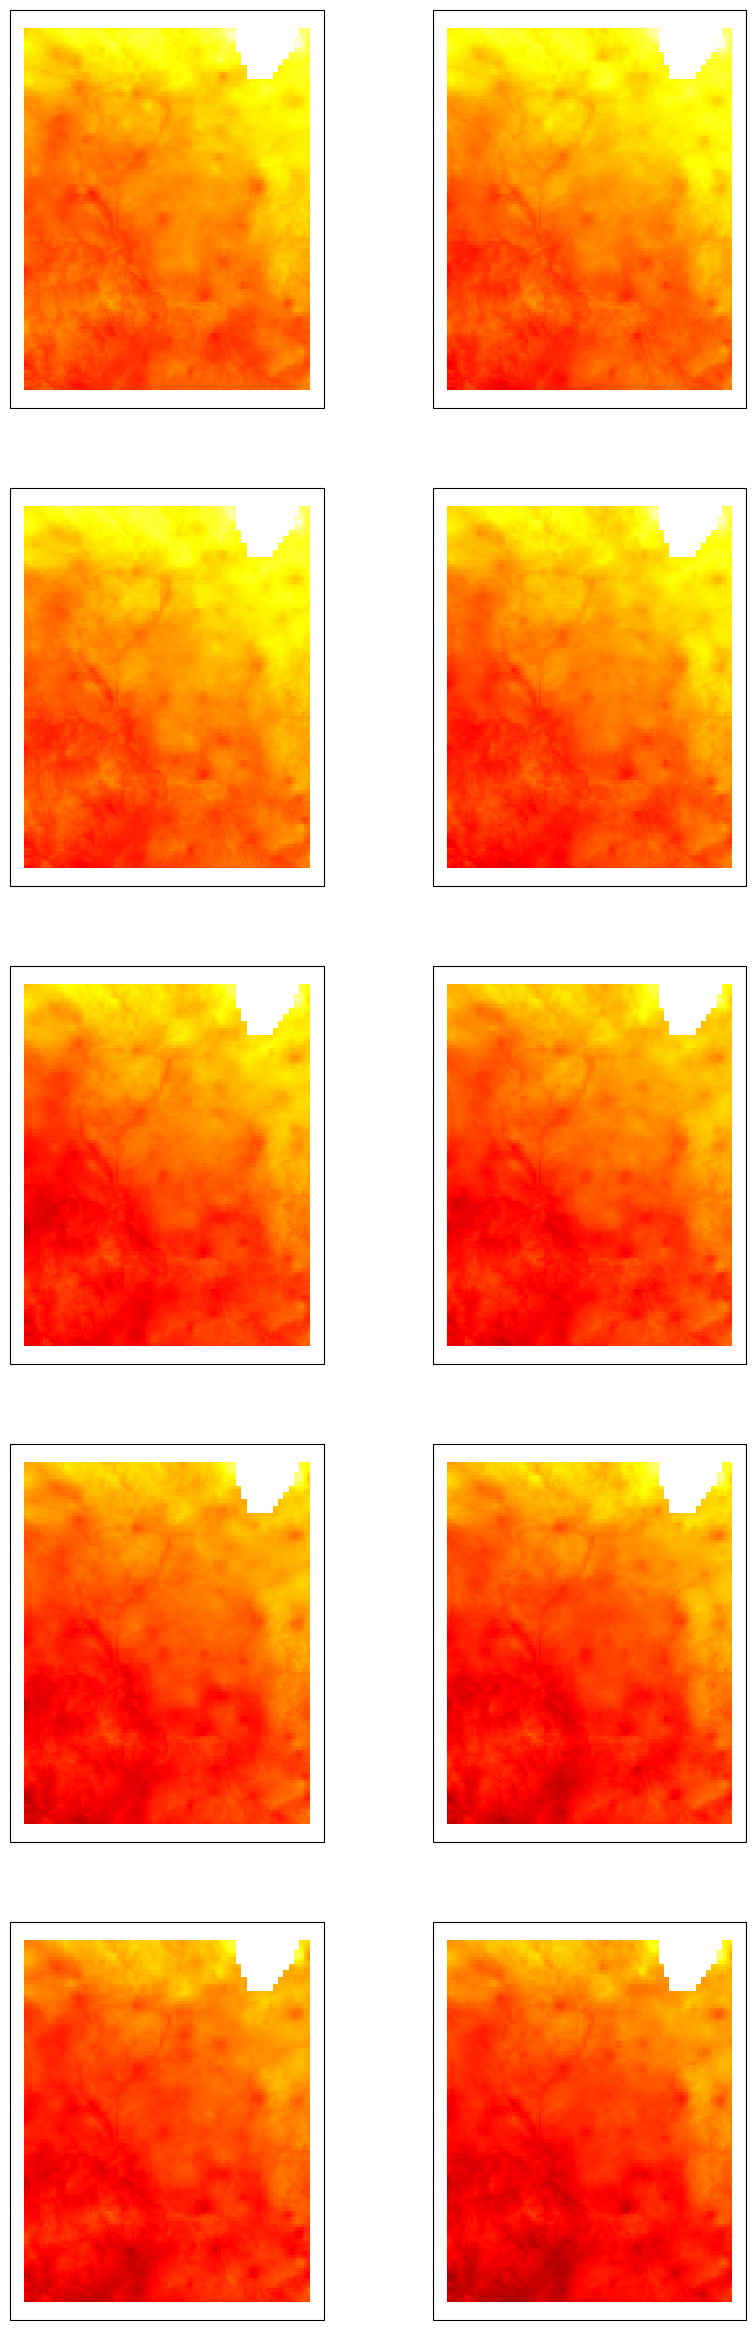

In [20]:
plt.rcParams['figure.figsize'] = [10, 30]
fig, ax = plt.subplots(5,2, subplot_kw={'projection':ccrs.PlateCarree(central_longitude=180)})
ax = ax.flatten()

vmin = 302.59
vmax = 313.71

i = 0
for time in geoframe_dict:
    geof = geoframe_dict[time]
    geof.plot(column='value', ax=ax[i], vmin=vmin, vmax=vmax, cmap='hot_r',)
    i += 1

In [21]:
tasmax_e.rio.set_spatial_dims(x_dim='lon', y_dim='lat', inplace=True)
tasmax_e.rio.write_crs('NAD83', inplace=True)

NameError: name 'tasmax_e' is not defined

In [ ]:
tasmax_df = tasmax_e.to_dataframe()
tasmax_reset = tasmax_df.reset_index()
tasmax_reset

In [22]:
shape = gpd.read_file('/data/keeling/a/mailes2/a/shape_data/IL_BNDY_County/IL_BNDY_County_Py.shp')
shape

,COUNTY_NAM,CO_FIPS,geometry
0,MCHENRY,111,"POLYGON ((-88.70742 42.49351, -88.68809 42.493..."
1,BOONE,7,"POLYGON ((-88.70742 42.49351, -88.7074 42.4934..."
2,OGLE,141,"POLYGON ((-89.68808 42.19949, -89.66846 42.200..."
3,WILL,197,"POLYGON ((-88.26146 41.72439, -88.26146 41.724..."
4,LASALLE,99,"POLYGON ((-88.93885 41.62836, -88.93871 41.628..."
...,...,...,...
97,JEFFERSON,81,"POLYGON ((-89.14445 38.47386, -89.12638 38.473..."
98,LAWRENCE,101,"POLYGON ((-87.90805 38.85012, -87.88944 38.849..."
99,MARION,121,"POLYGON ((-89.13843 38.73632, -89.13827 38.750..."
100,UNION,181,"POLYGON ((-89.04143 37.59649, -89.04143 37.596..."


In [23]:
shape.total_bounds

array([-91.5135183,  36.9699719, -87.4952139,  42.5083479])

In [24]:
shape.crs

<Geographic 2D CRS: EPSG:4269>
Name: NAD83
Axis Info [ellipsoidal]:
- Lat[north]: Geodetic latitude (degree)
- Lon[east]: Geodetic longitude (degree)
Area of Use:
- name: North America - onshore and offshore: Canada - Alberta; British Columbia; Manitoba; New Brunswick; Newfoundland and Labrador; Northwest Territories; Nova Scotia; Nunavut; Ontario; Prince Edward Island; Quebec; Saskatchewan; Yukon. Puerto Rico. United States (USA) - Alabama; Alaska; Arizona; Arkansas; California; Colorado; Connecticut; Delaware; Florida; Georgia; Hawaii; Idaho; Illinois; Indiana; Iowa; Kansas; Kentucky; Louisiana; Maine; Maryland; Massachusetts; Michigan; Minnesota; Mississippi; Missouri; Montana; Nebraska; Nevada; New Hampshire; New Jersey; New Mexico; New York; North Carolina; North Dakota; Ohio; Oklahoma; Oregon; Pennsylvania; Rhode Island; South Carolina; South Dakota; Tennessee; Texas; Utah; Vermont; Virginia; Washington; West Virginia; Wisconsin; Wyoming. US Virgin Islands. British Virgin Islands

In [31]:
gf_2019 = geoframe_dict['2019-12-31 00:00:00'].copy()
gf_2019['area'] = gf_2019.area
gf_2019

/tmp/ipykernel_19073/2889285797.py:2: UserWarning: Geometry is in a geographic CRS. Results from 'area' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.

  gf_2019['area'] = gf_2019.area


,value,geometry,area
0,306.201569,"POLYGON ((-92.8125 42.6875, -92.8125 42.625, -...",0.003906
1,306.182617,"POLYGON ((-92.75 42.6875, -92.75 42.625, -92.6...",0.003906
2,306.046631,"POLYGON ((-92.6875 42.6875, -92.6875 42.625, -...",0.003906
3,305.882965,"POLYGON ((-92.625 42.6875, -92.625 42.625, -92...",0.003906
4,305.903961,"POLYGON ((-92.5625 42.6875, -92.5625 42.625, -...",0.003906
...,...,...,...
11341,307.900543,"POLYGON ((-86.3125 36.0625, -86.3125 36, -86.2...",0.003906
11342,307.638336,"POLYGON ((-86.25 36.0625, -86.25 36, -86.1875 ...",0.003906
11343,307.323883,"POLYGON ((-86.1875 36.0625, -86.1875 36, -86.1...",0.003906
11344,307.462372,"POLYGON ((-86.125 36.0625, -86.125 36, -86.062...",0.003906


In [32]:
shape_temp = gf_2019.overlay(shape)
shape_temp

,value,area,COUNTY_NAM,CO_FIPS,geometry
0,305.417389,0.003906,JO DAVIESS,85,"POLYGON ((-90.625 42.5, -90.64708 42.5, -90.64..."
1,305.045441,0.003906,JO DAVIESS,85,"POLYGON ((-90.5625 42.5, -90.625 42.5, -90.625..."
2,304.956146,0.003906,JO DAVIESS,85,"POLYGON ((-90.5 42.5, -90.5625 42.5, -90.5625 ..."
3,305.094849,0.003906,JO DAVIESS,85,"POLYGON ((-90.4375 42.5, -90.5 42.5, -90.5 42...."
4,305.192841,0.003906,JO DAVIESS,85,"POLYGON ((-90.375 42.5, -90.4375 42.5, -90.437..."
...,...,...,...,...,...
5484,308.067993,0.003906,ALEXANDER,3,"POLYGON ((-89.1875 37.0625, -89.1875 37, -89.1..."
5485,308.018646,0.003906,ALEXANDER,3,"POLYGON ((-89.1875 37, -89.1875 37.0625, -89.1..."
5486,308.354980,0.003906,ALEXANDER,3,"POLYGON ((-89.26325 37, -89.26325 37, -89.2633..."
5487,308.080048,0.003906,ALEXANDER,3,"POLYGON ((-89.1875 37, -89.1875 36.97345, -89...."


<Axes: >

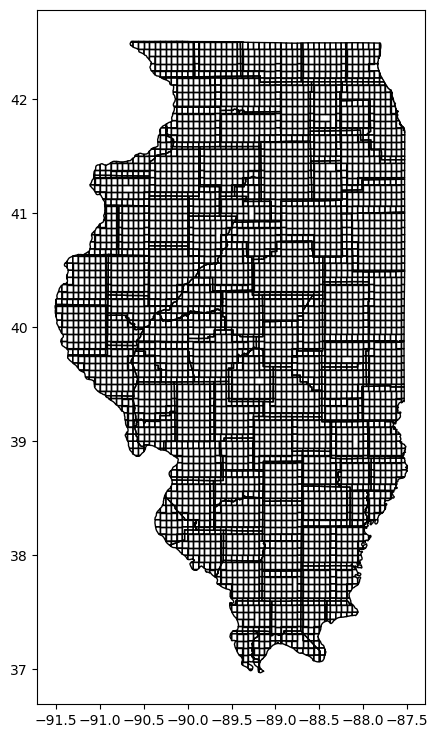

In [33]:
plt.rcParams['figure.figsize'] = [5, 15]
shape_temp.plot(color='none')

<Axes: >

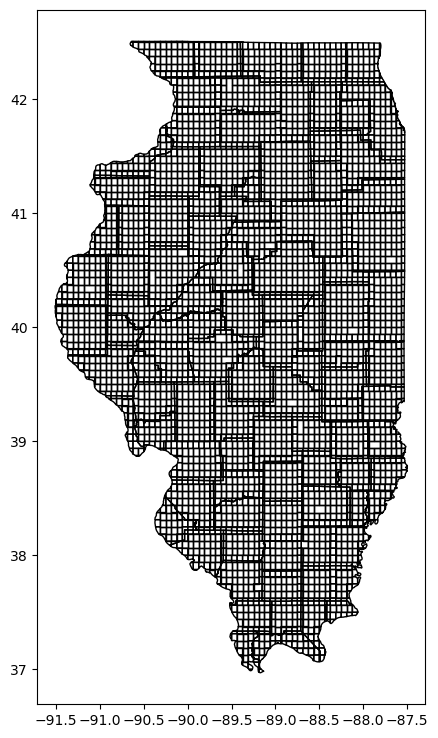

In [28]:
plt.rcParams['figure.figsize'] = [5, 15]
shape_temp.plot(color='none')

In [34]:
shape_temp['area_sub'] = shape_temp.area
shape_temp

/tmp/ipykernel_19073/1152918458.py:1: UserWarning: Geometry is in a geographic CRS. Results from 'area' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.

  shape_temp['area_sub'] = shape_temp.area


,value,area,COUNTY_NAM,CO_FIPS,geometry,area_sub
0,305.417389,0.003906,JO DAVIESS,85,"POLYGON ((-90.625 42.5, -90.64708 42.5, -90.64...",0.000153
1,305.045441,0.003906,JO DAVIESS,85,"POLYGON ((-90.5625 42.5, -90.625 42.5, -90.625...",0.000494
2,304.956146,0.003906,JO DAVIESS,85,"POLYGON ((-90.5 42.5, -90.5625 42.5, -90.5625 ...",0.000477
3,305.094849,0.003906,JO DAVIESS,85,"POLYGON ((-90.4375 42.5, -90.5 42.5, -90.5 42....",0.000459
4,305.192841,0.003906,JO DAVIESS,85,"POLYGON ((-90.375 42.5, -90.4375 42.5, -90.437...",0.000443
...,...,...,...,...,...,...
5484,308.067993,0.003906,ALEXANDER,3,"POLYGON ((-89.1875 37.0625, -89.1875 37, -89.1...",0.002146
5485,308.018646,0.003906,ALEXANDER,3,"POLYGON ((-89.1875 37, -89.1875 37.0625, -89.1...",0.000618
5486,308.354980,0.003906,ALEXANDER,3,"POLYGON ((-89.26325 37, -89.26325 37, -89.2633...",0.000336
5487,308.080048,0.003906,ALEXANDER,3,"POLYGON ((-89.1875 37, -89.1875 36.97345, -89....",0.000189


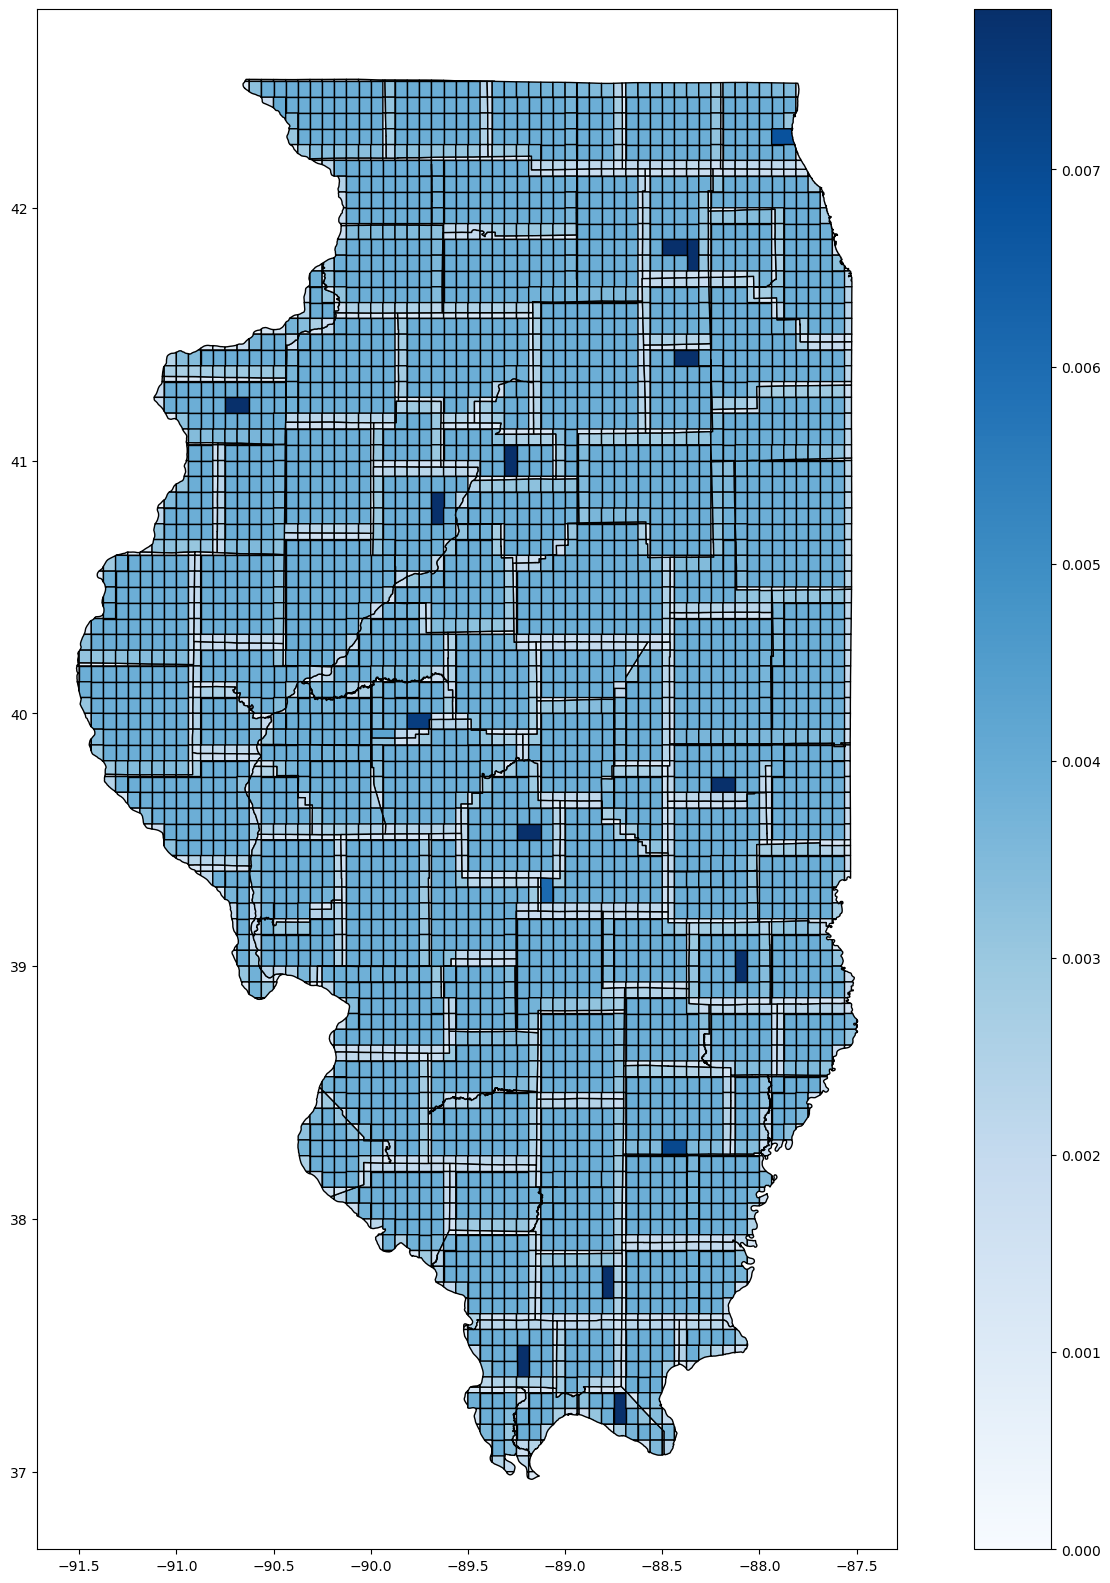

In [35]:
plt.rcParams['figure.figsize'] = [20, 20]
#base = geoframe_dict['2019-12-31 00:00:00'].plot(color='none', edgecolor='grey')
shape_temp.plot(
   # ax=base, 
    column='area_sub', 
    edgecolor='black',
    legend=True, 
    cmap='Blues',
);

In [36]:
shape_temp['area_prop'] = shape_temp['area_sub'] / shape_temp['area']
shape_temp['tasmax'] = shape_temp['value'] * shape_temp['area_prop']
shape_temp

,value,area,COUNTY_NAM,CO_FIPS,geometry,area_sub,area_prop,tasmax
0,305.417389,0.003906,JO DAVIESS,85,"POLYGON ((-90.625 42.5, -90.64708 42.5, -90.64...",0.000153,0.039137,11.953066
1,305.045441,0.003906,JO DAVIESS,85,"POLYGON ((-90.5625 42.5, -90.625 42.5, -90.625...",0.000494,0.126420,38.563919
2,304.956146,0.003906,JO DAVIESS,85,"POLYGON ((-90.5 42.5, -90.5625 42.5, -90.5625 ...",0.000477,0.121987,37.200675
3,305.094849,0.003906,JO DAVIESS,85,"POLYGON ((-90.4375 42.5, -90.5 42.5, -90.5 42....",0.000459,0.117488,35.844928
4,305.192841,0.003906,JO DAVIESS,85,"POLYGON ((-90.375 42.5, -90.4375 42.5, -90.437...",0.000443,0.113366,34.598548
...,...,...,...,...,...,...,...,...
5484,308.067993,0.003906,ALEXANDER,3,"POLYGON ((-89.1875 37.0625, -89.1875 37, -89.1...",0.002146,0.549280,169.215494
5485,308.018646,0.003906,ALEXANDER,3,"POLYGON ((-89.1875 37, -89.1875 37.0625, -89.1...",0.000618,0.158222,48.735213
5486,308.354980,0.003906,ALEXANDER,3,"POLYGON ((-89.26325 37, -89.26325 37, -89.2633...",0.000336,0.086136,26.560525
5487,308.080048,0.003906,ALEXANDER,3,"POLYGON ((-89.1875 37, -89.1875 36.97345, -89....",0.000189,0.048506,14.943747


In [37]:
shape2 = shape.copy()
shape2

,COUNTY_NAM,CO_FIPS,geometry
0,MCHENRY,111,"POLYGON ((-88.70742 42.49351, -88.68809 42.493..."
1,BOONE,7,"POLYGON ((-88.70742 42.49351, -88.7074 42.4934..."
2,OGLE,141,"POLYGON ((-89.68808 42.19949, -89.66846 42.200..."
3,WILL,197,"POLYGON ((-88.26146 41.72439, -88.26146 41.724..."
4,LASALLE,99,"POLYGON ((-88.93885 41.62836, -88.93871 41.628..."
...,...,...,...
97,JEFFERSON,81,"POLYGON ((-89.14445 38.47386, -89.12638 38.473..."
98,LAWRENCE,101,"POLYGON ((-87.90805 38.85012, -87.88944 38.849..."
99,MARION,121,"POLYGON ((-89.13843 38.73632, -89.13827 38.750..."
100,UNION,181,"POLYGON ((-89.04143 37.59649, -89.04143 37.596..."


In [38]:
shape_temp2 = shape_temp.groupby('COUNTY_NAM')['tasmax'].sum().reset_index()
shape_temp3 = shape_temp.groupby('COUNTY_NAM')['area_prop'].sum().reset_index()
shape_temp3['weight_tasmax'] = shape_temp2['tasmax'] / shape_temp3['area_prop']
shape_temp3

,COUNTY_NAM,area_prop,weight_tasmax
0,ADAMS,60.907771,307.650387
1,ALEXANDER,17.040091,308.069341
2,BOND,26.245034,307.586478
3,BOONE,20.423394,305.621440
4,BROWN,21.472113,307.820546
...,...,...,...
97,WHITESIDE,50.073177,306.241229
98,WILL,60.655304,305.996302
99,WILLIAMSON,29.096102,307.757729
100,WINNEBAGO,37.602424,305.499689


In [39]:
shape2 = pd.merge(shape2, shape_temp3[['COUNTY_NAM', 'weight_tasmax']], on='COUNTY_NAM', how='left')
shape2

,COUNTY_NAM,CO_FIPS,geometry,weight_tasmax
0,MCHENRY,111,"POLYGON ((-88.70742 42.49351, -88.68809 42.493...",305.298670
1,BOONE,7,"POLYGON ((-88.70742 42.49351, -88.7074 42.4934...",305.621440
2,OGLE,141,"POLYGON ((-89.68808 42.19949, -89.66846 42.200...",305.401506
3,WILL,197,"POLYGON ((-88.26146 41.72439, -88.26146 41.724...",305.996302
4,LASALLE,99,"POLYGON ((-88.93885 41.62836, -88.93871 41.628...",306.364900
...,...,...,...,...
97,JEFFERSON,81,"POLYGON ((-89.14445 38.47386, -89.12638 38.473...",307.365431
98,LAWRENCE,101,"POLYGON ((-87.90805 38.85012, -87.88944 38.849...",307.441117
99,MARION,121,"POLYGON ((-89.13843 38.73632, -89.13827 38.750...",307.293022
100,UNION,181,"POLYGON ((-89.04143 37.59649, -89.04143 37.596...",307.849919


In [40]:
gf_2019['value'].sum()

np.float64(3485654.587310791)

In [41]:
shape2['tasmax'].sum()

KeyError: 'tasmax'

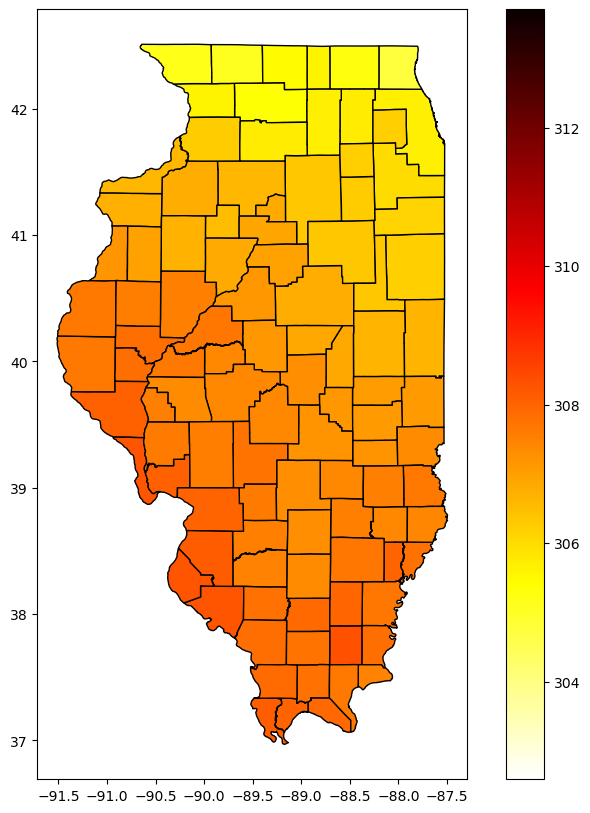

In [42]:
plt.rcParams['figure.figsize'] = [10, 10]

base = shape2.plot(
    column='weight_tasmax', 
    edgecolor='black',
    legend=True, 
    cmap='hot_r',
    vmin = 302.59,
    vmax = 313.71
);
#gf_2019.plot(ax=base, color='none', edgecolor='grey', legend=True);

In [ ]:
plt.rcParams['figure.figsize'] = [10, 10]

base = shape2.plot(
    column='weight_tasmax', 
    edgecolor='black',
    legend=True, 
    cmap='hot_r',
    vmin = 302.59,
    vmax = 313.71
);
#gf_2019.plot(ax=base, color='none', edgecolor='grey', legend=True);

In [47]:
def weighted_aggregation(path, path_tif, shapefile_path):
    dataset_io = rioxarray.open_rasterio(path)
    dataset_io.rio.to_raster(path_tif)
    dataset_tif = rasterio.open(path_tif)
    shapefile = gpd.read_file(shapefile_path)
    
    time_str = [str(i) for i in dataset_io['time'].values]
    print(time_str)
    
    shapes = []
    for band in range(1,len(time_str)+1):
        shapes.append(rasterio.features.shapes(rasterio.band(dataset_tif, band)))
    print(shapes)
    
    geoframe_dict = {}
    aggregate_dict = {}
    for band in range(0,len(time_str)):
        pol = list(shapes[band])
    
        # Going from a list of GeoJSON-like dicts to a list of shapely geometry objects
        geom = [shapely.geometry.shape(i[0]) for i in pol]
        # Convert to a GeoSeries
        geom = gpd.GeoSeries(geom, crs='NAD83')
    
        # Extract values as well
        values = [i[1] for i in pol]
        values = pd.Series(values)
    
        geoframe = gpd.GeoDataFrame({'value': values, 'geometry': geom})
    
        geoframe['area'] = geoframe.area
        shape_grid = geoframe.overlay(shapefile)
        print(shape_grid)
        shape_grid['area_sub'] = shape_grid.area
        shape_grid['area_prop'] = shape_grid['area_sub'] / shape_grid['area']
        shape_grid['value_weight'] = shape_grid['value'] * shape_grid['area_prop']
    
        var_sum_county = shape_grid.groupby('COUNTY_NAM')['value_weight'].sum().reset_index()
        area_prop_county = shape_grid.groupby('COUNTY_NAM')['area_prop'].sum().reset_index()
        shape_grid['weight_vals'] = var_sum_county['value_weight'] / area_prop_county['area_prop']
    
        shapefile = pd.merge(shapefile, shape_grid[['COUNTY_NAM', 'weight_vals']], on='COUNTY_NAM', how='left')
        
        geoframe_dict[time_str[band]] = geoframe
        aggregate_dict[time_str[band]] = shapefile
        print(time_str[band])
    
    return geoframe_dict, aggregate_dict

In [ ]:
gf_dict, ag_dict = weighted_aggregation('LOCA2_tasmax_2020_2070_ssp245_lonchange_5yrmean_04_16_25.nc', 'LOCA2_test.tif',
                     '/data/keeling/a/mailes2/a/shape_data/IL_BNDY_County/IL_BNDY_County_Py.shp')

['2019-12-31 00:00:00', '2024-12-31 00:00:00', '2029-12-31 00:00:00', '2034-12-31 00:00:00', '2039-12-31 00:00:00', '2044-12-31 00:00:00', '2049-12-31 00:00:00', '2054-12-31 00:00:00', '2059-12-31 00:00:00', '2064-12-31 00:00:00']
[<generator object shapes at 0x2b45e03b22f0>, <generator object shapes at 0x2b45e03b3100>, <generator object shapes at 0x2b45e03b2b60>, <generator object shapes at 0x2b45e03b2020>, <generator object shapes at 0x2b45e03b31f0>, <generator object shapes at 0x2b45e03b32e0>, <generator object shapes at 0x2b45e03b33d0>, <generator object shapes at 0x2b45e03b34c0>, <generator object shapes at 0x2b45e03b35b0>, <generator object shapes at 0x2b45e03b36a0>]


/tmp/ipykernel_19073/4031205528.py:31: UserWarning: Geometry is in a geographic CRS. Results from 'area' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.

  geoframe['area'] = geoframe.area


           value      area  COUNTY_NAM  CO_FIPS  \
0     305.417389  0.003906  JO DAVIESS       85   
1     305.045441  0.003906  JO DAVIESS       85   
2     304.956146  0.003906  JO DAVIESS       85   
3     305.094849  0.003906  JO DAVIESS       85   
4     305.192841  0.003906  JO DAVIESS       85   
...          ...       ...         ...      ...   
5484  308.067993  0.003906   ALEXANDER        3   
5485  308.018646  0.003906   ALEXANDER        3   
5486  308.354980  0.003906   ALEXANDER        3   
5487  308.080048  0.003906   ALEXANDER        3   
5488  308.027161  0.003906   ALEXANDER        3   

                                               geometry  
0     POLYGON ((-90.625 42.5, -90.64708 42.5, -90.64...  
1     POLYGON ((-90.5625 42.5, -90.625 42.5, -90.625...  
2     POLYGON ((-90.5 42.5, -90.5625 42.5, -90.5625 ...  
3     POLYGON ((-90.4375 42.5, -90.5 42.5, -90.5 42....  
4     POLYGON ((-90.375 42.5, -90.4375 42.5, -90.437...  
...                                    

/tmp/ipykernel_19073/4031205528.py:34: UserWarning: Geometry is in a geographic CRS. Results from 'area' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.

  shape_grid['area_sub'] = shape_grid.area
/tmp/ipykernel_19073/4031205528.py:31: UserWarning: Geometry is in a geographic CRS. Results from 'area' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.

  geoframe['area'] = geoframe.area


             value      area  COUNTY_NAM  CO_FIPS  weight_vals  \
0       305.653687  0.003906  JO DAVIESS       85   307.650387   
1       305.653687  0.003906  JO DAVIESS       85   308.069341   
2       305.653687  0.003906  JO DAVIESS       85   307.586478   
3       305.653687  0.003906  JO DAVIESS       85   305.621440   
4       305.653687  0.003906  JO DAVIESS       85   307.820546   
...            ...       ...         ...      ...          ...   
332342  308.246307  0.003906   ALEXANDER        3          NaN   
332343  308.246307  0.003906   ALEXANDER        3          NaN   
332344  308.246307  0.003906   ALEXANDER        3          NaN   
332345  308.246307  0.003906   ALEXANDER        3          NaN   
332346  308.246307  0.003906   ALEXANDER        3          NaN   

                                                 geometry  
0       POLYGON ((-90.625 42.5, -90.64708 42.5, -90.64...  
1       POLYGON ((-90.625 42.5, -90.64708 42.5, -90.64...  
2       POLYGON ((-90.625 4

/tmp/ipykernel_19073/4031205528.py:34: UserWarning: Geometry is in a geographic CRS. Results from 'area' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.

  shape_grid['area_sub'] = shape_grid.area


2024-12-31 00:00:00


/tmp/ipykernel_19073/4031205528.py:31: UserWarning: Geometry is in a geographic CRS. Results from 'area' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.

  geoframe['area'] = geoframe.area
